In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
df = pd.read_csv('data/data_train.csv', usecols = [
       'SALE PRICE', 'histdist', 'landmark', 'landuse', 'YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'FELONY', 'VIOLATION', 'MISDEMEANOR',
       'Num of SAT Test Takers', 'satReadingSum', 'satMathSum',
       'satWritingSum'])

In [3]:
df['landuse'] = df['landuse'].astype(str)
df['sat'] = df['satReadingSum'] + df['satMathSum'] + df['satWritingSum']
df['crime'] = df['FELONY'] + df['VIOLATION'] + df['MISDEMEANOR']
df.drop(['satReadingSum', 'satMathSum', 'satWritingSum', 'FELONY', 'VIOLATION', 'MISDEMEANOR'], axis=1, inplace=True)

df = df[['SALE PRICE', 'YEAR BUILT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements',
       'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'Num of SAT Test Takers', 'sat', 'crime',
       'histdist', 'landmark', 'landuse']]
print(df.shape)
df.head()

(8885, 56)


,SALE PRICE,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,easements,lotarea,bldgarea,...,park_num,park_area,park_top_level,park_distance,Num of SAT Test Takers,sat,crime,histdist,landmark,landuse
0,3750000,110,3,0,3,2018,3354,0.0,2018.0,3354.0,...,5,22.051,2,0.001133,3825,1519.0,1526.0,Mount Morris Park Historic District,NaN,2.0
1,5000000,119,26,4,30,5060,20310,0.0,5060.0,20310.0,...,6,179.671,2,0.001841,4005,1370.0,1139.0,NaN,NaN,4.0
2,5000000,119,26,4,30,5060,20310,0.0,5060.0,20310.0,...,6,179.671,2,0.001792,4005,1370.0,1131.0,NaN,NaN,4.0
3,29100000,99,26,1,27,4642,27141,0.0,4642.0,27141.0,...,8,843.074,3,0.000745,3825,1519.0,1672.0,NaN,NaN,4.0
4,2350000,116,0,0,0,0,0,0.0,10013.0,23521.0,...,2,844.633,3,0.001081,9100,1374.0,206.0,Upper East Side Historic District,NaN,3.0


# Preprocessing

## Cleaning

### Extremum filter

In [4]:
sale_price = sorted(df['SALE PRICE'])

In [5]:
# percent_right = 0.9973 # 3 std
percent_right = 0.9545 # 2 std
percent_left = len(list(filter(lambda x: x<200000, sale_price)))/len(sale_price)
percent_left

0.03421496904895892

In [6]:
price_left = sale_price[int(len(sale_price) * percent_left)]
price_right = sale_price[int(len(sale_price) * percent_right)]

In [7]:
df = df.fillna(0) # fillna

# df = df[(df['SALE PRICE'] > price_left) & (df['SALE PRICE'] < price_right)]
df = df[df['SALE PRICE'] > price_left] # delete left
# df = df[df['SALE PRICE'] < price_right] # delete right

print(df.shape)
df.head()

(8577, 56)


,SALE PRICE,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,easements,lotarea,bldgarea,...,park_num,park_area,park_top_level,park_distance,Num of SAT Test Takers,sat,crime,histdist,landmark,landuse
0,3750000,110,3,0,3,2018,3354,0.0,2018.0,3354.0,...,5,22.051,2,0.001133,3825,1519.0,1526.0,Mount Morris Park Historic District,0,2.0
1,5000000,119,26,4,30,5060,20310,0.0,5060.0,20310.0,...,6,179.671,2,0.001841,4005,1370.0,1139.0,0,0,4.0
2,5000000,119,26,4,30,5060,20310,0.0,5060.0,20310.0,...,6,179.671,2,0.001792,4005,1370.0,1131.0,0,0,4.0
3,29100000,99,26,1,27,4642,27141,0.0,4642.0,27141.0,...,8,843.074,3,0.000745,3825,1519.0,1672.0,0,0,4.0
4,2350000,116,0,0,0,0,0,0.0,10013.0,23521.0,...,2,844.633,3,0.001081,9100,1374.0,206.0,Upper East Side Historic District,0,3.0


### Numeric & Categoric split

In [8]:
numeric_list = ['YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'crime',
       'Num of SAT Test Takers', 'sat']

categoric_list = ['histdist', 'landmark', 'landuse']

In [9]:
Y = df[['SALE PRICE']]
X = df[numeric_list]

### feature selection

In [10]:
import seaborn as sns

In [11]:
corr = df.corr()

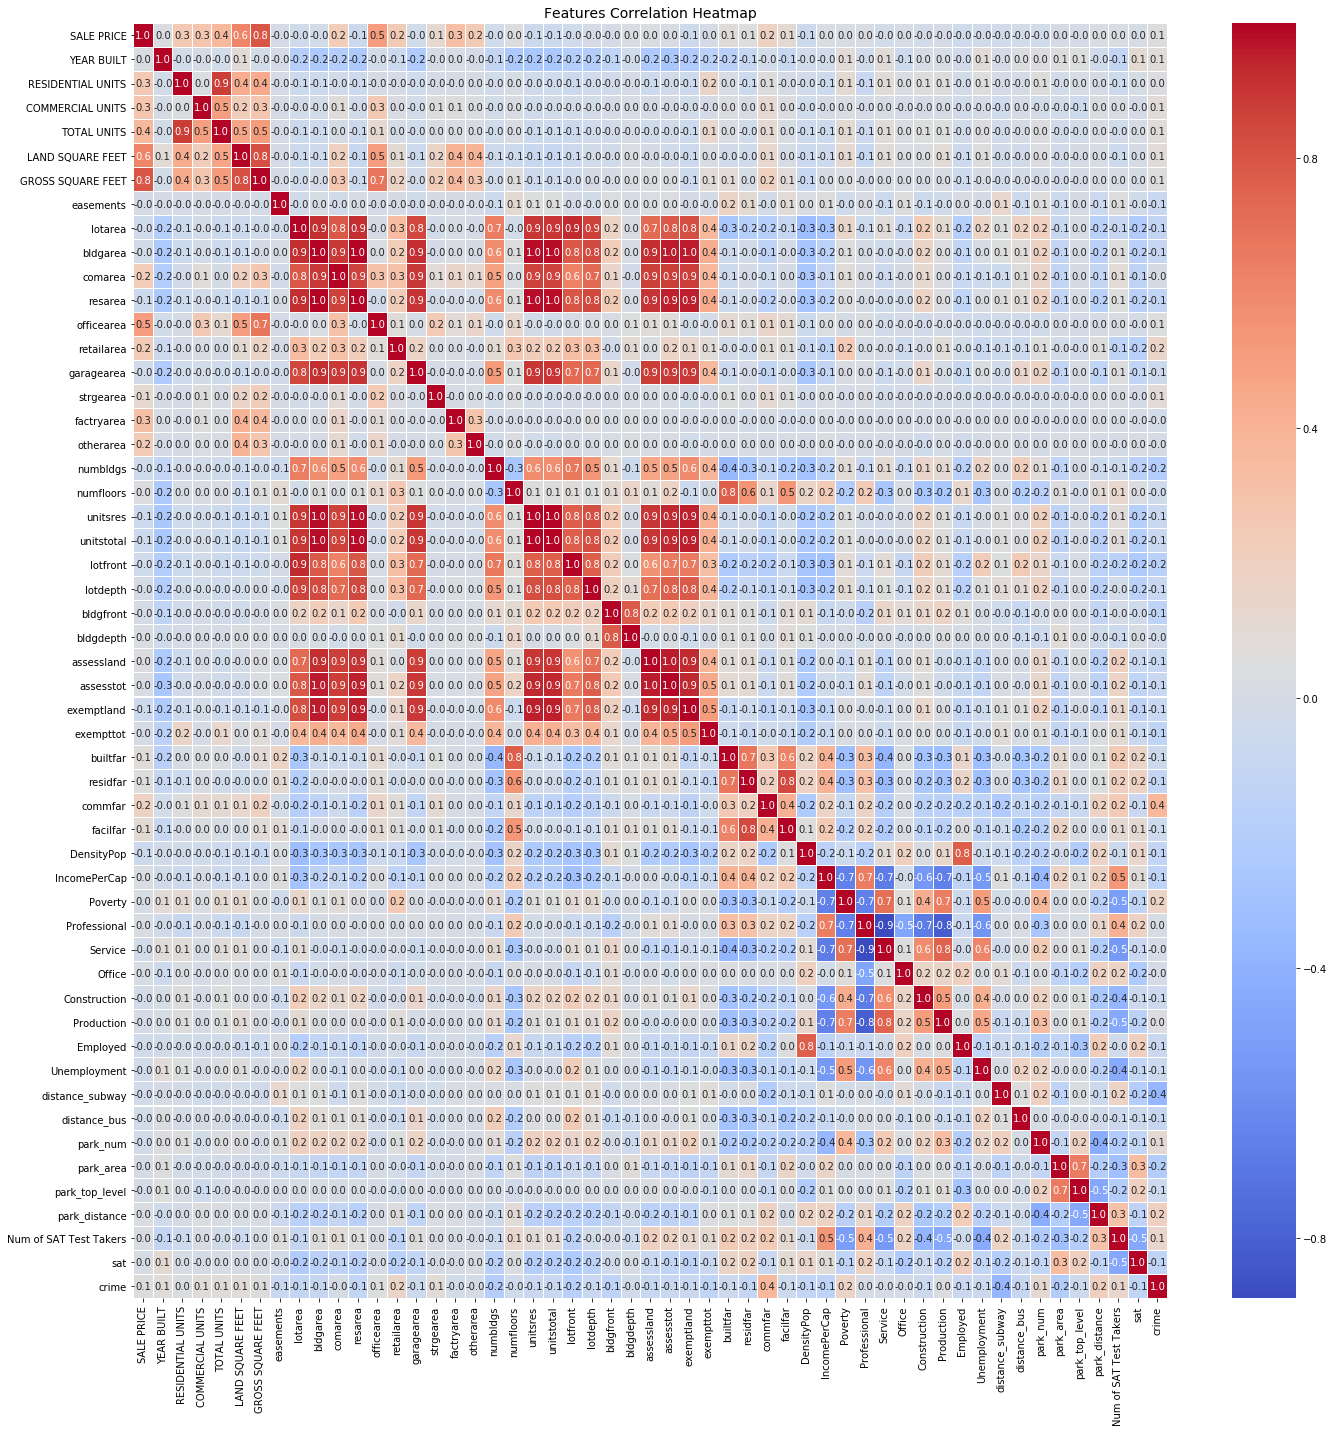

In [12]:
fig,ax = plt.subplots(figsize = (20,20))
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = 'coolwarm', fmt = '.1f', linewidth = .05)
fig.subplots_adjust(top = 0.95)
plt.title('Features Correlation Heatmap', fontsize=14)
plt.tight_layout()

#### method 1
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [13]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = df.iloc[:,:-3].columns[columns]
df_select = df[selected_columns]
print(len(selected_columns))

44


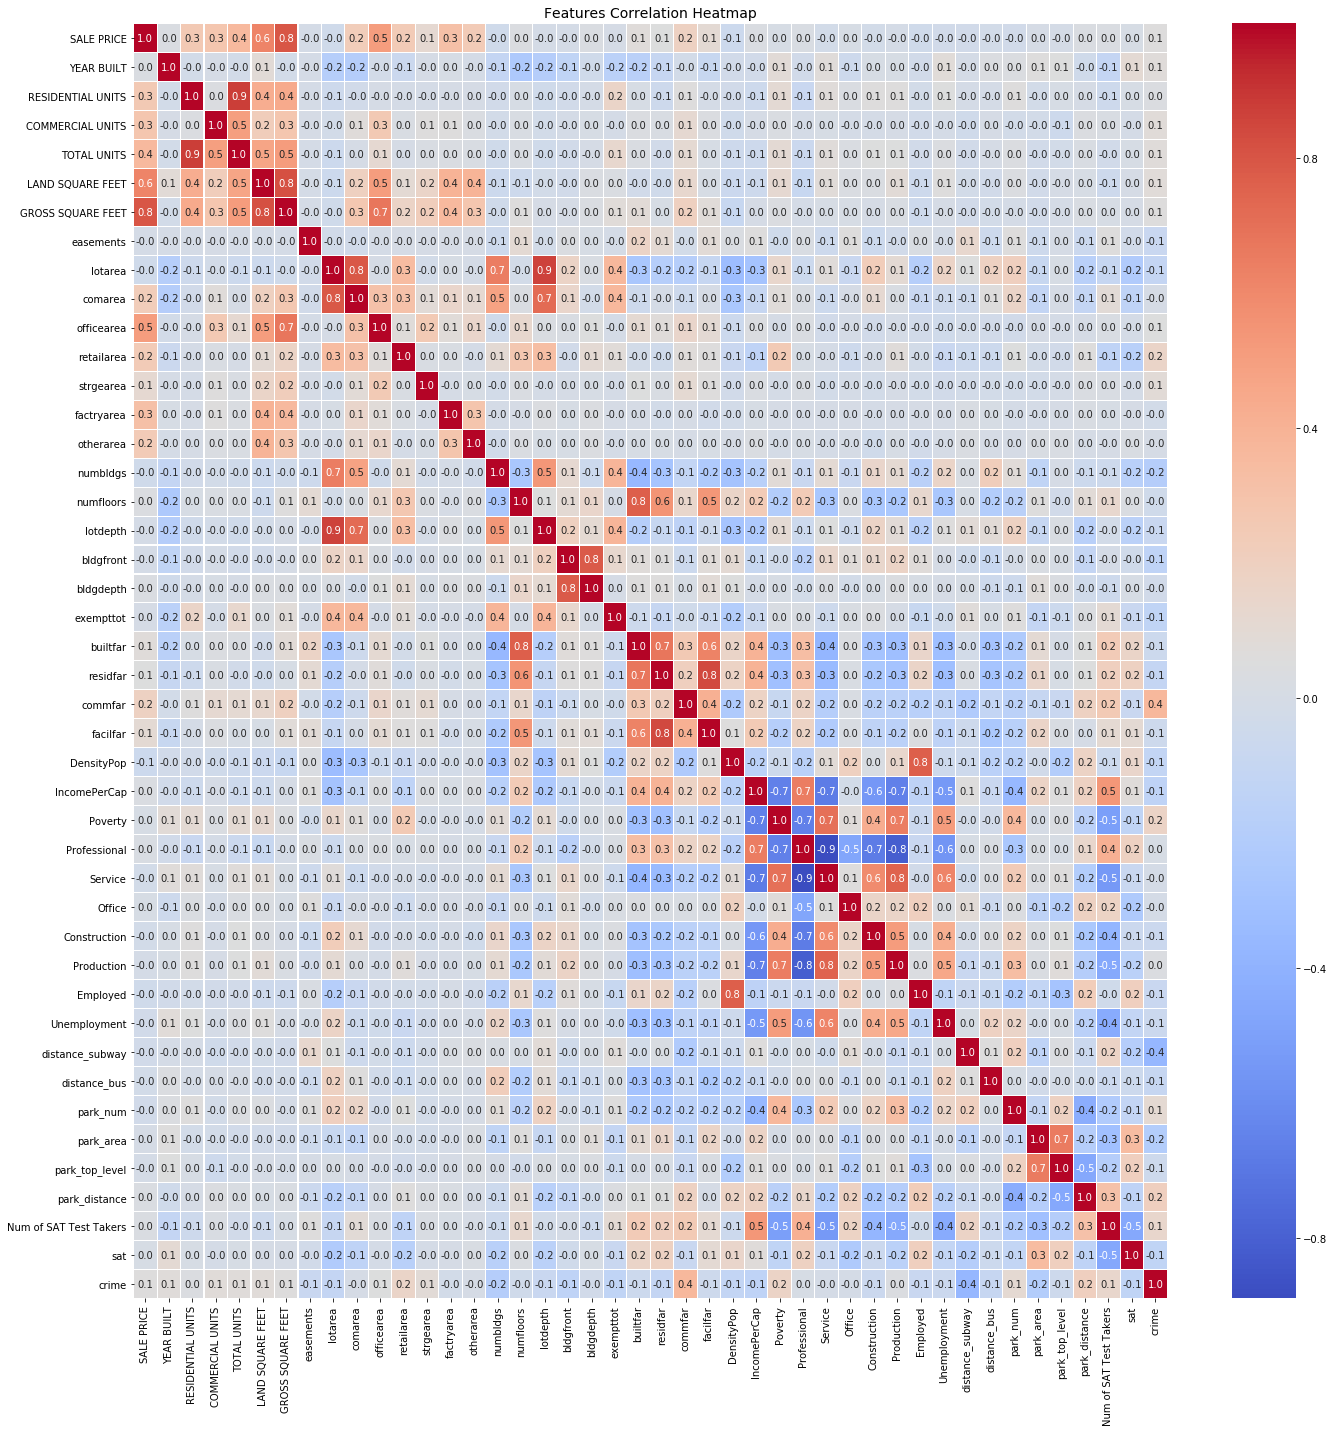

In [14]:
fig,ax = plt.subplots(figsize = (20,20))
corr = df_select.corr()
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = 'coolwarm', fmt = '.1f', linewidth = .05)
fig.subplots_adjust(top = 0.95)

plt.title('Features Correlation Heatmap', fontsize=14)

plt.tight_layout()

In [15]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
df_select_modeled, selected_columns = backwardElimination(df_select.iloc[:,1:].values, df_select.iloc[:,0].values, SL, selected_columns)
print(len(selected_columns))

30


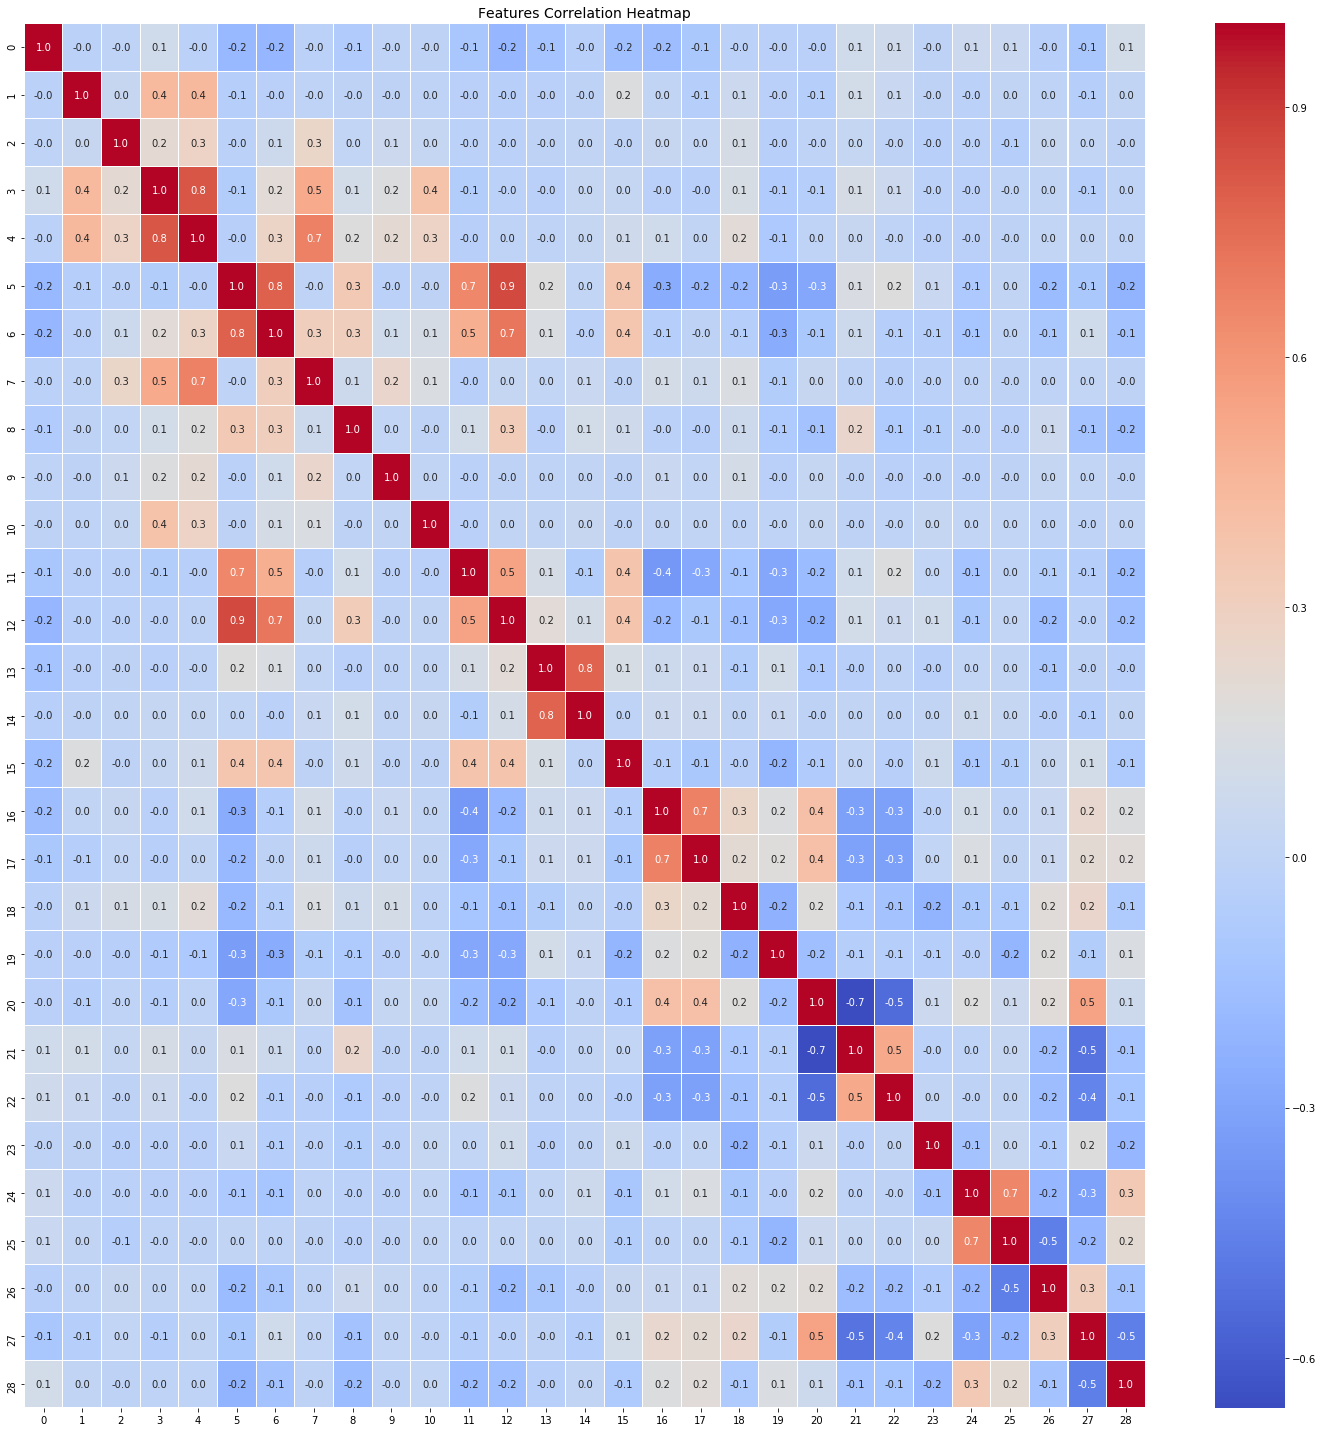

In [16]:
fig,ax = plt.subplots(figsize = (20,20))
corr = pd.DataFrame(df_select_modeled).corr()
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = 'coolwarm', fmt = '.1f', linewidth = .05)
fig.subplots_adjust(top = 0.95)

plt.title('Features Correlation Heatmap', fontsize=14)

plt.tight_layout()

## Standardize


### method 1
https://blog.csdn.net/FrankieHello/article/details/79659111

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()
std_data = ss.fit_transform(df[numeric_list])
origin_data = ss.inverse_transform(std_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### method 2
https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

In [19]:
def standardize(df):
    return (df-df.mean())/df.std()

In [20]:
def standardize_inverse(df, mean, std):
    return std * df + mean

In [21]:
temp = standardize(df['YEAR BUILT'])
temp.head()

0    0.538397
1    0.708449
2    0.708449
3    0.330556
4    0.651765
Name: YEAR BUILT, dtype: float64

In [22]:
mean, std = df['YEAR BUILT'].mean(), df['YEAR BUILT'].std()

In [23]:
standardize_inverse(temp, mean, std).head()

0    110.0
1    119.0
2    119.0
3     99.0
4    116.0
Name: YEAR BUILT, dtype: float64

In [24]:
X_standardized = X.apply(standardize)
Y_standardized = Y.apply(standardize)

## Train & Test split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [26]:
X_standardized_train, X_standardized_test, Y_standardized_train, Y_standardized_test = \
train_test_split(X_standardized, Y_standardized, test_size=0.33, random_state=42)

## Whitening

http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

## PCA

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/  
https://stackoverflow.com/questions/26182329/how-do-i-convert-new-data-into-the-pca-components-of-my-training-data

n_components：  
默认值为保留所有特征值维度，即不进行主成分降维；  
取大于等于1的整数时，即指定我们希望降维后的维数；  
取0-1的浮点数时，即指定降维后的方差和占比，比例越大，保留的信息越多。系统会自行计算保留的维度个数。  
https://blog.csdn.net/Genius9_9/article/details/81098840  

所以在实际使用PCA时，我们不需要选择k，而是直接设置n_components为float数据。  
https://blog.csdn.net/ybdesire/article/details/64546435

In [27]:
from sklearn.decomposition import PCA

### method 1

In [28]:
n = X_standardized_train.shape[1] # how many eigenvectors we choose
pca = PCA(n,whiten=True) #PCA model, paramerized by the target number of components or target percentage of variance

pca.fit(X_standardized_train) #fit the model to the data

PCA(copy=True, iterated_power='auto', n_components=52, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [29]:
# X_train_numeric = pca.transform(X_train_numeric) #find principal components

Text(0, 0.5, 'variance')

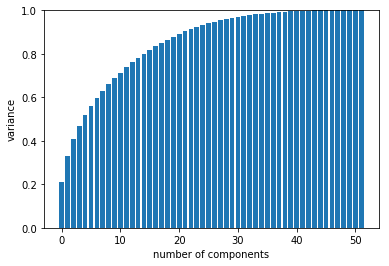

In [30]:
#Plot explained variance per number of leading PC's to choose
eigenvalues = pca.explained_variance_
plt.bar(np.arange(n), eigenvalues.cumsum()/eigenvalues.sum(),align='center');
plt.ylim(0,1)
# plt.xlim(0,n)
plt.xlabel('number of components')
plt.ylabel('variance')

In [31]:
p=0.8
pca = PCA(p)
P = pca.fit_transform(X_standardized_train)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 15 PCs to explain 80.00 percent of variance


In [32]:
p=0.9
pca = PCA(p)
P = pca.fit_transform(X_standardized_train)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 22 PCs to explain 90.00 percent of variance


In [33]:
p=0.95
pca = PCA(p)
P = pca.fit_transform(X_standardized_train)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 28 PCs to explain 95.00 percent of variance


### method 2

In [34]:
p=0.8
pca = PCA(p,whiten=True) #PCA model, paramerized by the target number of components or target percentage of variance

pca.fit(X_standardized_train) #fit the model to the data
eigenvalues = pca.explained_variance_

X_standardized_train_PCA = pca.transform(X_standardized_train) #find principal components
n = X_standardized_train_PCA.shape[1] # how many eigenvectors we choose

print("we need %d PCs to explain %.2f percent of variance"%(n,100*p))

we need 15 PCs to explain 80.00 percent of variance


In [35]:
pd.DataFrame(X_standardized_train_PCA).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000e+00,1.878151e-17,5.295687e-16,2.619411e-16,-4.035066e-17,-4.925322e-16,5.118621e-16,-5.932784e-18,1.732827e-16,-1.502038e-16,-6.904834e-17,-9.794469e-16,-4.048207e-16,-1.725919e-16,2.350322e-16
1,1.878151e-17,1.000000e+00,2.659003e-17,3.537882e-16,2.249530e-16,-1.127253e-17,-7.467192e-17,-2.280450e-16,-1.503306e-16,4.367457e-18,-6.246816e-17,-4.485273e-16,-8.591184e-17,-2.243636e-16,3.206445e-17
2,5.295687e-16,2.659003e-17,1.000000e+00,3.750312e-16,1.292651e-16,-1.168826e-16,-9.985727e-16,-2.820488e-17,-3.218729e-16,6.865072e-16,-8.498182e-17,2.746039e-16,-6.843960e-17,-6.247686e-16,-6.142220e-16
3,2.619411e-16,3.537882e-16,3.750312e-16,1.000000e+00,1.819065e-16,-1.208781e-16,1.256900e-16,-2.577959e-17,1.665624e-16,-4.407846e-16,-5.031755e-16,3.174402e-16,-2.537183e-16,1.791237e-16,-2.558707e-16
4,-4.035066e-17,2.249530e-16,1.292651e-16,1.819065e-16,1.000000e+00,6.985709e-16,-4.607281e-16,1.273906e-16,4.944309e-17,2.168752e-16,2.721641e-16,3.006238e-16,-1.379807e-17,-2.342000e-16,1.692993e-16
5,-4.925322e-16,-1.127253e-17,-1.168826e-16,-1.208781e-16,6.985709e-16,1.000000e+00,-3.668181e-16,-1.443000e-16,-5.504204e-16,-5.562372e-16,-3.156744e-16,-6.451722e-17,-1.387054e-16,1.356521e-16,-1.778072e-16
6,5.118621e-16,-7.467192e-17,-9.985727e-16,1.256900e-16,-4.607281e-16,-3.668181e-16,1.000000e+00,-8.156709e-16,-4.799855e-17,-1.969124e-16,3.834763e-16,-5.843406e-18,-1.073312e-16,-5.355159e-16,-2.131768e-16
7,-5.932784e-18,-2.280450e-16,-2.820488e-17,-2.577959e-17,1.273906e-16,-1.443000e-16,-8.156709e-16,1.000000e+00,-3.319847e-16,-3.069395e-16,-5.256408e-18,1.480165e-16,-8.510744e-17,2.492929e-18,-3.318615e-16
8,1.732827e-16,-1.503306e-16,-3.218729e-16,1.665624e-16,4.944309e-17,-5.504204e-16,-4.799855e-17,-3.319847e-16,1.000000e+00,-4.000281e-17,4.798840e-16,2.124023e-16,-1.545326e-16,-2.080774e-16,1.633690e-16
9,-1.502038e-16,4.367457e-18,6.865072e-16,-4.407846e-16,2.168752e-16,-5.562372e-16,-1.969124e-16,-3.069395e-16,-4.000281e-17,1.000000e+00,-4.025790e-16,1.133063e-16,-2.679802e-16,4.915901e-16,9.645606e-17


In [36]:
X_standardized_test_PCA = pca.transform(X_standardized_test)  #Don't use fit_transform, just apply the pca we learned before
pd.DataFrame(X_standardized_test_PCA).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.029686,-0.025594,0.002038,0.046722,-0.014042,0.050131,-0.027358,-0.109330,-0.082581,0.072338,0.000528,-0.013533,0.047147,-0.006422
1,-0.029686,1.000000,0.013865,0.041528,0.007341,0.045636,0.011851,0.024941,-0.054394,-0.001933,-0.004336,-0.011431,0.000001,0.020666,0.022469
2,-0.025594,0.013865,1.000000,0.063005,0.029079,-0.288637,-0.121459,0.002370,0.151756,-0.024226,-0.050201,-0.092689,-0.020286,-0.018580,-0.530417
3,0.002038,0.041528,0.063005,1.000000,-0.048121,0.145380,-0.003478,-0.019495,0.000130,0.034891,0.058487,-0.050840,0.115666,0.057507,0.041370
4,0.046722,0.007341,0.029079,-0.048121,1.000000,0.038568,-0.004802,-0.011153,0.035280,-0.013591,-0.036308,-0.025948,-0.031577,0.033597,-0.034788
5,-0.014042,0.045636,-0.288637,0.145380,0.038568,1.000000,0.260797,0.138296,-0.382568,0.157514,0.017574,0.092986,0.152778,-0.039204,-0.235543
6,0.050131,0.011851,-0.121459,-0.003478,-0.004802,0.260797,1.000000,0.029704,-0.434429,0.036416,-0.091438,-0.128609,-0.006467,-0.003432,0.151213
7,-0.027358,0.024941,0.002370,-0.019495,-0.011153,0.138296,0.029704,1.000000,0.156933,-0.093666,-0.000421,-0.032823,-0.050850,0.018774,-0.039006
8,-0.109330,-0.054394,0.151756,0.000130,0.035280,-0.382568,-0.434429,0.156933,1.000000,0.181040,-0.215034,-0.185946,0.043082,0.003308,0.178635
9,-0.082581,-0.001933,-0.024226,0.034891,-0.013591,0.157514,0.036416,-0.093666,0.181040,1.000000,0.119009,-0.315817,0.110825,0.076024,-0.103620


# Modeling

### predict out of sample
http://www.statsmodels.org/0.6.1/examples/notebooks/generated/predict.html

In [37]:
from sklearn.metrics import r2_score

### Cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html  
https://morvanzhou.github.io/tutorials/machine-learning/sklearn/3-2-cross-validation1/  

Scoring parameter: https://scikit-learn.org/stable/modules/model_evaluation.html

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
print("In sample R-squared: %f"%reg.score(X_train, Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test, Y_test))

In sample R-squared: 0.687777
Out of sample R-squared: 0.735486


In [40]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train, Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.34 (+/- 0.73)


array([ 0.79934916, -0.01850434,  0.85389043,  0.03193803,  0.1479941 ,
        0.25610652,  0.18020532, -0.21850572,  0.70843313,  0.66659217])

## Multivariate linear regression model

In [41]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### original

In [42]:
mod = sm.OLS(Y_train, X_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        12:26:26   Log-Likelihood:            -1.0367e+05
No. Observations:                5746   AIC:                         2.074e+05
Df Residuals:                    5695   BIC:                         2.078e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT              3.875e+04   4918.358      7.878      0.000    2.91e+04    4.84e+04
RESIDENTIAL UNITS      -3.405e+05   3.28e+04    -10.385      0.000   -4.05e+05   -2.76e+05
COMMERCIAL UNITS        5.397e+05    5.7e+04      9.470      0.000    4.28e+05    6.51e+05
TOTAL UNITS             1.993e+05   3.18e+04      6.263      0.000    1.37e+05    2.62e+05
LAND SQUARE FEET        -839.7774    124.120     -6.766      0.000   -1083.100    -596.454
GROSS SQUARE FEET        777.5728     25.786     30.154      0.000     727.022     828.124
easements               1.486e+06    2.7e+06      0.551      0.582    -3.8e+06    6.78e+06
lotarea                  -14.2814     21.121     -0.676      0.499     -55.686      27.123
bldgarea                -227.8369     32.520     -7.006      0.000    -291.589    -164.085
comarea                  143.0978     44.113      3.244      0.001      56.619     229.576
resarea                  208.1415     31.709      6.564      0.000     145.980     270.303
officearea              -134.3788     40.765     -3.296      0.001    -214.293     -54.465
retailarea               397.9842     37.167     10.708      0.000     325.123     470.846
garagearea                63.0245     51.156      1.232      0.218     -37.261     163.310
strgearea               -485.6121     98.466     -4.932      0.000    -678.643    -292.582
factryarea               180.8951     47.622      3.799      0.000      87.539     274.251
otherarea                361.8590     62.882      5.755      0.000     238.585     485.133
numbldgs               -4850.8781   1.16e+05     -0.042      0.967   -2.31e+05    2.22e+05
numfloors              -1.109e+05   7.61e+04     -1.458      0.145    -2.6e+05    3.82e+04
unitsres                4.093e+05   8.28e+04      4.941      0.000    2.47e+05    5.72e+05
unitstotal             -4.213e+05   8.26e+04     -5.100      0.000   -5.83e+05   -2.59e+05
lotfront                1.575e+04   5734.100      2.746      0.006    4507.265     2.7e+04
lotdepth               -3915.3151   3931.948     -0.996      0.319   -1.16e+04    3792.799
bldgfront               5879.8110   3979.649      1.477      0.140   -1921.816    1.37e+04
bldgdepth              -3454.8642   3449.754     -1.001      0.317   -1.02e+04    3307.967
assessland                 1.8147      0.201      9.036      0.000       1.421       2.208
assesstot                 -0.0402      0.066     -0.613      0.540      -0.169       0.088
exemptland                 2.8880      0.960      3.008      0.003       1.006       4.771
exempttot                 -0.4174      0.086     -4.848      0.000      -0.586      -0.249
builtfar               -3.107e+05   1.29e+05     -2.400      0.016   -5.64e+05   -5.69e+04
residfar                6.195e+05   1.81e+05      3.418      0.001    2.64e+05  

In [43]:
Y_pred = mod.predict(X_test)
r2_score(Y_test, Y_pred)

0.7351365908723696

**Cross-validation**

In [44]:
reg = LinearRegression().fit(X_train, Y_train)
print("In sample R-squared: %f"%reg.score(X_train, Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test, Y_test))

In sample R-squared: 0.687777
Out of sample R-squared: 0.735486


In [45]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train, Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.34 (+/- 0.73)


array([ 0.79934916, -0.01850434,  0.85389043,  0.03193803,  0.1479941 ,
        0.25610652,  0.18020532, -0.21850572,  0.70843313,  0.66659217])

### log

In [46]:
mod = sm.OLS(np.log(Y_train), X_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.481e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        12:26:26   Log-Likelihood:                -6809.1
No. Observations:                5746   AIC:                         1.372e+04
Df Residuals:                    5695   BIC:                         1.406e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0012      0.000      5.269      0.000       0.001       0.002
RESIDENTIAL UNITS          0.0016      0.002      1.002      0.316      -0.002       0.005
COMMERCIAL UNITS           0.0119      0.003      4.373      0.000       0.007       0.017
TOTAL UNITS                0.0135      0.002      8.863      0.000       0.010       0.016
LAND SQUARE FEET           0.0001   5.93e-06     17.166      0.000    9.01e-05       0.000
GROSS SQUARE FEET      -2.639e-06   1.23e-06     -2.143      0.032   -5.05e-06   -2.25e-07
easements                  0.3233      0.129      2.509      0.012       0.071       0.576
lotarea                 7.299e-06   1.01e-06      7.236      0.000    5.32e-06    9.28e-06
bldgarea                 2.24e-06   1.55e-06      1.442      0.149   -8.05e-07    5.28e-06
comarea                -1.002e-05   2.11e-06     -4.755      0.000   -1.41e-05   -5.89e-06
resarea                -1.647e-06   1.51e-06     -1.088      0.277   -4.62e-06    1.32e-06
officearea              6.485e-06   1.95e-06      3.331      0.001    2.67e-06    1.03e-05
retailarea              9.402e-06   1.78e-06      5.297      0.000    5.92e-06    1.29e-05
garagearea              5.794e-06   2.44e-06      2.372      0.018       1e-06    1.06e-05
strgearea               2.578e-05    4.7e-06      5.482      0.000    1.66e-05     3.5e-05
factryarea             -1.728e-06   2.27e-06     -0.760      0.447   -6.19e-06    2.73e-06
otherarea               2.067e-05      3e-06      6.882      0.000    1.48e-05    2.66e-05
numbldgs                  -0.0069      0.006     -1.253      0.210      -0.018       0.004
numfloors                 -0.0146      0.004     -4.018      0.000      -0.022      -0.007
unitsres                   0.0094      0.004      2.367      0.018       0.002       0.017
unitstotal                -0.0133      0.004     -3.374      0.001      -0.021      -0.006
lotfront                  -0.0014      0.000     -5.161      0.000      -0.002      -0.001
lotdepth                  -0.0014      0.000     -7.413      0.000      -0.002      -0.001
bldgfront                 -0.0006      0.000     -2.925      0.003      -0.001      -0.000
bldgdepth                  0.0004      0.000      2.195      0.028    3.87e-05       0.001
assessland              2.298e-08   9.59e-09      2.396      0.017    4.18e-09    4.18e-08
assesstot               2.239e-08   3.13e-09      7.152      0.000    1.63e-08    2.85e-08
exemptland              2.018e-07   4.59e-08      4.401      0.000    1.12e-07    2.92e-07
exempttot              -2.283e-08   4.11e-09     -5.552      0.000   -3.09e-08   -1.48e-08
builtfar                  -0.0118      0.006     -1.911      0.056      -0.024       0.000
residfar                  -0.0167      0.009     -1.928      0.054      -0.034  

In [47]:
Y_pred =  mod.predict(X_test) 
r2_score(np.log(Y_test), Y_pred)

0.4076467414808922

**Cross-validation**

In [48]:
reg = LinearRegression().fit(X_train, np.log(Y_train))
print("In sample R-squared: %f"%reg.score(X_train, np.log(Y_train)))
print("Out of sample R-squared: %f"%reg.score(X_test, np.log(Y_test)))

In sample R-squared: 0.446089
Out of sample R-squared: 0.408152


In [49]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train, np.log(Y_train), cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: -2.54 (+/- 17.12)


array([ 4.00775978e-01,  4.11099616e-01,  4.48474571e-01, -5.59022368e-03,
       -2.82158135e+01,  1.98104593e-01,  4.28036531e-01,  9.46217286e-02,
        3.99080960e-01,  4.70959250e-01])

### stardardized

In [50]:
mod = sm.OLS(Y_standardized_train, X_standardized_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     246.0
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        12:26:26   Log-Likelihood:                -4889.9
No. Observations:                5746   AIC:                             9882.
Df Residuals:                    5695   BIC:                         1.022e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0700      0.009      7.857      0.000       0.053       0.087
RESIDENTIAL UNITS         -0.0789      0.009     -8.475      0.000      -0.097      -0.061
COMMERCIAL UNITS           0.1809      0.019      9.421      0.000       0.143       0.219
TOTAL UNITS                0.0164      0.009      1.885      0.059      -0.001       0.033
LAND SQUARE FEET          -0.1065      0.016     -6.832      0.000      -0.137      -0.076
GROSS SQUARE FEET          0.9042      0.030     29.982      0.000       0.845       0.963
easements                  0.0043      0.008      0.525      0.600      -0.012       0.020
lotarea                   -0.0466      0.081     -0.573      0.566      -0.206       0.113
bldgarea                  -4.1821      0.600     -6.966      0.000      -5.359      -3.005
comarea                    0.3730      0.116      3.229      0.001       0.147       0.599
resarea                    3.3274      0.513      6.484      0.000       2.321       4.333
officearea                -0.0964      0.030     -3.261      0.001      -0.154      -0.038
retailarea                 0.2717      0.025     10.784      0.000       0.222       0.321
garagearea                 0.0688      0.055      1.257      0.209      -0.038       0.176
strgearea                 -0.0363      0.007     -4.958      0.000      -0.051      -0.022
factryarea                 0.0541      0.014      3.866      0.000       0.027       0.082
otherarea                  0.0562      0.010      5.795      0.000       0.037       0.075
numbldgs                  -0.0015      0.014     -0.107      0.915      -0.029       0.026
numfloors                 -0.0302      0.021     -1.439      0.150      -0.071       0.011
unitsres                   5.8409      1.164      5.018      0.000       3.559       8.123
unitstotal                -6.0540      1.169     -5.179      0.000      -8.346      -3.762
lotfront                   0.1198      0.044      2.730      0.006       0.034       0.206
lotdepth                  -0.0206      0.019     -1.058      0.290      -0.059       0.018
bldgfront                  0.0308      0.020      1.534      0.125      -0.009       0.070
bldgdepth                 -0.0186      0.018     -1.022      0.307      -0.054       0.017
assessland                 0.4843      0.054      8.940      0.000       0.378       0.590
assesstot                 -0.0363      0.079     -0.458      0.647      -0.192       0.119
exemptland                 0.1932      0.064      3.035      0.002       0.068       0.318
exempttot                 -0.0627      0.013     -4.880      0.000      -0.088      -0.038
builtfar                  -0.0484      0.020     -2.418      0.016      -0.088      -0.009
residfar                   0.0587      0.018      3.278      0.001       0.024  

In [51]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_standardized_test)
r2_score(Y_standardized_test, Y_pred)

0.7354872979465332

**Cross-validation**

In [52]:
reg = LinearRegression().fit(X_standardized_train, Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train, Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test, Y_standardized_test))

In sample R-squared: 0.687777
Out of sample R-squared: 0.735486


In [53]:
reg = LinearRegression()
scores = cross_val_score(reg, X_standardized_train, Y_standardized_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.32 (+/- 0.68)


array([ 0.79934916, -0.01064801,  0.85394118,  0.10264192,  0.1479941 ,
        0.25519001,  0.11250076, -0.21850572,  0.59725263,  0.53569994])

### PCA

In [54]:
mod = sm.OLS(Y_standardized_train, X_standardized_train_PCA).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     546.2
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        12:26:27   Log-Likelihood:                -5683.7
No. Observations:                5746   AIC:                         1.140e+04
Df Residuals:                    5731   BIC:                         1.150e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0130      0.009     -1.507      0.132      -0.030       0.004
x2            -0.0470      0.009     -5.472      0.000      -0.064      -0.030
x3             0.7426      0.009     86.391      0.000       0.726       0.759
x4            -0.0667      0.009     -7.759      0.000      -0.084      -0.050
x5            -0.0383      0.009     -4.456      0.000      -0.055      -0.021
x6             0.1644      0.009     19.121      0.000       0.148       0.181
x7             0.0103      0.009      1.193      0.233      -0.007       0.027
x8             0.0246      0.009      2.862      0.004       0.008       0.041
x9             0.0265      0.009      3.084      0.002       0.010       0.043
x10            0.0221      0.009      2.567      0.010       0.005       0.039
x11           -0.0158      0.009     -1.834      0.067      -0.033       0.001
x12            0.0299      0.009      3.482      0.001       0.013       0.047
x13           -0.0062      0.009     -0.718      0.473      -0.023       0.011
x14           -0.0479      0.009     -5.570      0.000      -0.065      -0.031
x15           -0.1151      0.009    -13.388      0.000      -0.132      -0.098
==============================================================================
Omnibus:                    13601.818   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        271901514.214
Skew:                          23.335   Prob(JB):                         0.00
Kurtosis:                    1067.662   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_standardized_test_PCA)
r2_score(Y_standardized_test, Y_pred)

0.4900159792812694

**Cross-validation**

In [56]:
reg = LinearRegression().fit(X_standardized_train_PCA, Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train_PCA, Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test_PCA, Y_standardized_test))

In sample R-squared: 0.588421
Out of sample R-squared: 0.490078


In [57]:
reg = LinearRegression()
scores = cross_val_score(reg, X_standardized_train_PCA, Y_standardized_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.42 (+/- 0.68)


array([ 0.56415147,  0.03769219,  0.78486261,  0.59872816,  0.91806819,
        0.27064359,  0.34354615, -0.31765833,  0.514824  ,  0.5033791 ])

### feature selection

#### Top 10

In [58]:
 abs(df.corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1]

,SALE PRICE
retailarea,0.239686
otherarea,0.244198
RESIDENTIAL UNITS,0.259088
COMMERCIAL UNITS,0.284432
factryarea,0.323596
TOTAL UNITS,0.357732
officearea,0.506109
LAND SQUARE FEET,0.624461
GROSS SQUARE FEET,0.799625


In [59]:
selected_columns_top10 = abs(df.corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1].index

In [60]:
mod = sm.OLS(Y_train, X_train[selected_columns_top10]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1397.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        12:26:27   Log-Likelihood:            -1.0397e+05
No. Observations:                5746   AIC:                         2.079e+05
Df Residuals:                    5738   BIC:                         2.080e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
retailarea          125.4163     11.253     11.145      0.000     103.356     147.476
otherarea           341.2440     53.541      6.374      0.000     236.283     446.204
RESIDENTIAL UNITS  -2.12e+05   1.68e+04    -12.611      0.000   -2.45e+05   -1.79e+05
COMMERCIAL UNITS   2.501e+05   1.91e+04     13.107      0.000    2.13e+05    2.88e+05
factryarea           92.2814     28.911      3.192      0.001      35.604     148.958
TOTAL UNITS        3.812e+04   1.26e+04      3.019      0.003    1.34e+04    6.29e+04
officearea         -162.8727     18.218     -8.940      0.000    -198.587    -127.158
LAND SQUARE FEET   -326.3831    118.668     -2.750      0.006    -559.018     -93.749
GROSS SQUARE FEET   725.6004     16.721     43.395      0.000     692.822     758.379
==============================================================================
Omnibus:                    14352.492   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        483509138.655
Skew:                          26.553   Prob(JB):                         0.00
Kurtosis:                    1423.109   Cond. No.                     4.06e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.92e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
Y_pred = mod.predict(X_test[selected_columns_top10])
r2_score(Y_test, Y_pred)

0.6970905633965228

**Cross-validation**

In [62]:
reg = LinearRegression().fit(X_train[selected_columns_top10], Y_train)
print("In sample R-squared: %f"%reg.score(X_train[selected_columns_top10], Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test[selected_columns_top10], Y_test))

In sample R-squared: 0.655632
Out of sample R-squared: 0.699522


In [63]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train[selected_columns_top10], Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.39 (+/- 0.70)


array([ 0.80014702,  0.04110634,  0.80715878,  0.52402403,  0.47903945,
        0.23396364, -0.00838267, -0.25271524,  0.65656123,  0.65608292])

#### original

In [64]:
mod = sm.OLS(Y_train, X_train[selected_columns[1:]]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     267.5
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        12:26:27   Log-Likelihood:            -1.0461e+05
No. Observations:                5746   AIC:                         2.093e+05
Df Residuals:                    5717   BIC:                         2.095e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT              1.104e+04   5457.371      2.024      0.043     344.655    2.17e+04
RESIDENTIAL UNITS      -4.253e+04   3.72e+04     -1.143      0.253   -1.15e+05    3.04e+04
TOTAL UNITS             4.735e+05   3.08e+04     15.363      0.000    4.13e+05    5.34e+05
LAND SQUARE FEET        1678.0702    125.515     13.369      0.000    1432.013    1924.128
easements              -3.325e+06      3e+06     -1.110      0.267    -9.2e+06    2.55e+06
lotarea                  -48.2732      7.060     -6.838      0.000     -62.113     -34.433
comarea                   50.8851      8.412      6.049      0.000      34.393      67.377
officearea               361.8196     17.194     21.044      0.000     328.113     395.526
retailarea               352.2307     17.611     20.000      0.000     317.706     386.755
factryarea               554.5543     31.309     17.712      0.000     493.177     615.932
otherarea                557.5610     61.155      9.117      0.000     437.674     677.448
numfloors              -4.705e+05   6.39e+04     -7.364      0.000   -5.96e+05   -3.45e+05
lotdepth               -3474.9779   3842.819     -0.904      0.366    -1.1e+04    4058.405
bldgfront               1.418e+04   3303.616      4.291      0.000    7700.787    2.07e+04
bldgdepth              -1.149e+04   3222.913     -3.564      0.000   -1.78e+04   -5167.022
exempttot                 -0.1909      0.071     -2.702      0.007      -0.329      -0.052
builtfar                3.451e+05   1.28e+05      2.699      0.007    9.45e+04    5.96e+05
residfar                1.089e+05   1.99e+05      0.549      0.583    -2.8e+05    4.98e+05
facilfar                4.917e+05    2.1e+05      2.346      0.019    8.09e+04    9.02e+05
DensityPop             -3.376e+08   3.04e+08     -1.110      0.267   -9.34e+08    2.59e+08
IncomePerCap             -10.3430      9.914     -1.043      0.297     -29.778       9.092
Employed                -197.6611    227.861     -0.867      0.386    -644.354     249.032
Unemployment            2.826e+05   9.48e+04      2.980      0.003    9.67e+04    4.69e+05
park_num               -1.823e+05   9.16e+04     -1.991      0.047   -3.62e+05   -2802.669
park_area               3684.2314   1530.736      2.407      0.016     683.409    6685.054
park_top_level         -7.959e+05   6.35e+05     -1.254      0.210   -2.04e+06    4.48e+05
park_distance          -2.624e+08   3.15e+08     -0.834      0.404   -8.79e+08    3.54e+08
Num of SAT Test Takers   823.4338    161.152      5.110      0.000     507.515    1139.353
crime                  -3503.1566    658.776     -5.318      0.000   -4794.608   -2211.706
==============================================================================
Omnibus:                    13302.907   Durbin-Watson:                   2.012
Prob(Omnibus)

In [65]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_test[selected_columns[1:]])
r2_score(Y_test, Y_pred)

0.47297008383158334

**Cross-validation**

In [66]:
reg = LinearRegression().fit(X_train[selected_columns[1:]], Y_train)
print("In sample R-squared: %f"%reg.score(X_train[selected_columns[1:]], Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test[selected_columns[1:]], Y_test))

In sample R-squared: 0.566981
Out of sample R-squared: 0.472461


In [67]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train[selected_columns[1:]], Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.22 (+/- 0.84)


array([ 0.43926583, -0.14016958,  0.6177586 ,  0.56166334,  0.64249625,
        0.23936807, -0.2144135 , -0.71244286,  0.51043471,  0.24553948])

#### original >- top10

In [68]:
selected_columns_top10 = abs(df[selected_columns].corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1].index

In [69]:
mod = sm.OLS(Y_train, X_train[selected_columns_top10]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     779.0
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        12:26:28   Log-Likelihood:            -1.0478e+05
No. Observations:                5746   AIC:                         2.096e+05
Df Residuals:                    5737   BIC:                         2.096e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
facilfar            8.58e+04   3.84e+04      2.233      0.026    1.05e+04    1.61e+05
comarea              -7.5898      3.953     -1.920      0.055     -15.339       0.160
retailarea          193.1281     14.153     13.646      0.000     165.383     220.873
otherarea           517.3250     61.761      8.376      0.000     396.251     638.399
RESIDENTIAL UNITS -1.018e+05   3.76e+04     -2.707      0.007   -1.75e+05   -2.81e+04
factryarea          568.0050     31.308     18.142      0.000     506.629     629.381
TOTAL UNITS        4.709e+05   3.15e+04     14.955      0.000    4.09e+05    5.33e+05
officearea          388.1197     15.818     24.537      0.000     357.111     419.129
LAND SQUARE FEET   2058.9443    121.069     17.006      0.000    1821.602    2296.286
==============================================================================
Omnibus:                    13390.157   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        205707465.085
Skew:                          22.553   Prob(JB):                         0.00
Kurtosis:                     928.834   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_test[selected_columns_top10])
r2_score(Y_test, Y_pred)

0.4075338030009975

**Cross-validation**

In [71]:
reg = LinearRegression().fit(X_train[selected_columns_top10], Y_train)
print("In sample R-squared: %f"%reg.score(X_train[selected_columns_top10], Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test[selected_columns_top10], Y_test))

In sample R-squared: 0.542626
Out of sample R-squared: 0.412374


In [72]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train[selected_columns_top10], Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.20 (+/- 0.94)


array([ 0.40611857, -0.08514569,  0.65368242,  0.58358751,  0.52927794,
        0.23913979, -0.03484792, -1.00432935,  0.51911851,  0.2348642 ])

#### log

In [73]:
selected_columns

Index(['SALE PRICE', 'YEAR BUILT', 'RESIDENTIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'easements', 'lotarea', 'comarea', 'officearea',
       'retailarea', 'factryarea', 'otherarea', 'numfloors', 'lotdepth',
       'bldgfront', 'bldgdepth', 'exempttot', 'builtfar', 'residfar',
       'facilfar', 'DensityPop', 'IncomePerCap', 'Employed', 'Unemployment',
       'park_num', 'park_area', 'park_top_level', 'park_distance',
       'Num of SAT Test Takers', 'crime'],
      dtype='object')

In [74]:
mod = sm.OLS(np.log(Y_train), X_train[selected_columns[1:]]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.838e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        12:26:28   Log-Likelihood:                -10256.
No. Observations:                5746   AIC:                         2.057e+04
Df Residuals:                    5717   BIC:                         2.076e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0070      0.000     17.273      0.000       0.006       0.008
RESIDENTIAL UNITS         -0.0081      0.003     -2.937      0.003      -0.013      -0.003
TOTAL UNITS                0.0182      0.002      7.981      0.000       0.014       0.023
LAND SQUARE FEET           0.0001   9.27e-06     13.236      0.000       0.000       0.000
easements                 -1.3295      0.221     -6.005      0.000      -1.763      -0.895
lotarea                 3.467e-06   5.22e-07      6.645      0.000    2.44e-06    4.49e-06
comarea                 -6.03e-06   6.22e-07     -9.701      0.000   -7.25e-06   -4.81e-06
officearea               3.96e-06   1.27e-06      3.117      0.002    1.47e-06    6.45e-06
retailarea              4.363e-06    1.3e-06      3.352      0.001    1.81e-06    6.91e-06
factryarea             -8.956e-06   2.31e-06     -3.871      0.000   -1.35e-05   -4.42e-06
otherarea               1.423e-05   4.52e-06      3.150      0.002    5.38e-06    2.31e-05
numfloors                 -0.0294      0.005     -6.218      0.000      -0.039      -0.020
lotdepth                   0.0029      0.000     10.282      0.000       0.002       0.003
bldgfront                  0.0003      0.000      1.086      0.278      -0.000       0.001
bldgdepth              -2.062e-05      0.000     -0.087      0.931      -0.000       0.000
exempttot               3.743e-08   5.22e-09      7.170      0.000    2.72e-08    4.77e-08
builtfar                   0.0144      0.009      1.527      0.127      -0.004       0.033
residfar                  -0.1043      0.015     -7.111      0.000      -0.133      -0.076
facilfar                   0.2759      0.015     17.817      0.000       0.246       0.306
DensityPop               359.9556     22.481     16.011      0.000     315.884     404.027
IncomePerCap            2.808e-05   7.33e-07     38.334      0.000    2.66e-05    2.95e-05
Employed                   0.0002   1.68e-05     11.943      0.000       0.000       0.000
Unemployment               0.2230      0.007     31.818      0.000       0.209       0.237
park_num                   0.1217      0.007     17.995      0.000       0.108       0.135
park_area                 -0.0010      0.000     -8.634      0.000      -0.001      -0.001
park_top_level             1.5640      0.047     33.358      0.000       1.472       1.656
park_distance            311.5939     23.241     13.407      0.000     266.032     357.156
Num of SAT Test Takers  9.578e-05   1.19e-05      8.044      0.000    7.24e-05       0.000
crime                      0.0009   4.87e-05     18.428      0.000       0.001       0.001
==============================================================================
Omnibus:                      607.956   Durbin-Watson:                   1.931
Prob(Omnibus)

In [75]:
Y_pred =  mod.predict(X_test[selected_columns[1:]]) 
r2_score(np.log(Y_test), Y_pred)

-1.0818600577422437

**Cross-validation**

In [76]:
reg = LinearRegression().fit(X_train[selected_columns[1:]], np.log(Y_train))
print("In sample R-squared: %f"%reg.score(X_train[selected_columns[1:]], np.log(Y_train)))
print("Out of sample R-squared: %f"%reg.score(X_test[selected_columns[1:]], np.log(Y_test)))

In sample R-squared: 0.368496
Out of sample R-squared: 0.333230


In [77]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train[selected_columns[1:]], np.log(Y_train), cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: -2.51 (+/- 16.72)


array([  0.28889338,   0.33026536,   0.37636445,   0.28061192,
       -27.58162608,   0.09296586,   0.37020219,   0.03107056,
         0.32341266,   0.40761028])

#### stardardized

In [78]:
mod = sm.OLS(Y_standardized_train, X_standardized_train[selected_columns[1:]]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     258.1
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        12:26:28   Log-Likelihood:                -5829.5
No. Observations:                5746   AIC:                         1.172e+04
Df Residuals:                    5717   BIC:                         1.191e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0217      0.010      2.148      0.032       0.002       0.042
RESIDENTIAL UNITS         -0.0203      0.017     -1.165      0.244      -0.054       0.014
TOTAL UNITS                0.2559      0.017     15.382      0.000       0.223       0.289
LAND SQUARE FEET           0.2108      0.016     13.381      0.000       0.180       0.242
easements                 -0.0108      0.009     -1.172      0.241      -0.029       0.007
lotarea                   -0.1822      0.027     -6.653      0.000      -0.236      -0.129
comarea                    0.1293      0.023      5.722      0.000       0.085       0.174
officearea                 0.2634      0.013     21.021      0.000       0.239       0.288
retailarea                 0.2391      0.012     20.001      0.000       0.216       0.262
factryarea                 0.1633      0.009     17.731      0.000       0.145       0.181
otherarea                  0.0861      0.009      9.127      0.000       0.068       0.105
numfloors                 -0.1315      0.018     -7.412      0.000      -0.166      -0.097
lotdepth                  -0.0139      0.019     -0.713      0.476      -0.052       0.024
bldgfront                  0.0730      0.017      4.353      0.000       0.040       0.106
bldgdepth                 -0.0616      0.017     -3.611      0.000      -0.095      -0.028
exempttot                 -0.0276      0.011     -2.608      0.009      -0.048      -0.007
builtfar                   0.0547      0.020      2.760      0.006       0.016       0.094
residfar                   0.0093      0.020      0.474      0.635      -0.029       0.048
facilfar                   0.0446      0.018      2.460      0.014       0.009       0.080
DensityPop                -0.0143      0.016     -0.880      0.379      -0.046       0.018
IncomePerCap              -0.0088      0.016     -0.548      0.584      -0.040       0.023
Employed                  -0.0100      0.015     -0.653      0.514      -0.040       0.020
Unemployment               0.0367      0.012      3.003      0.003       0.013       0.061
park_num                  -0.0183      0.011     -1.669      0.095      -0.040       0.003
park_area                  0.0315      0.014      2.205      0.027       0.004       0.060
park_top_level            -0.0098      0.014     -0.693      0.488      -0.037       0.018
park_distance             -0.0077      0.012     -0.622      0.534      -0.032       0.016
Num of SAT Test Takers     0.0699      0.014      5.171      0.000       0.043       0.096
crime                     -0.0548      0.011     -4.945      0.000      -0.076      -0.033
==============================================================================
Omnibus:                    13297.531   Durbin-Watson:                   2.012
Prob(Omnibus)

In [79]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_standardized_test[selected_columns[1:]])
r2_score(Y_standardized_test, Y_pred)

0.472473817156864

**Cross-validation**

In [80]:
reg = LinearRegression().fit(X_standardized_train[selected_columns[1:]], Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train[selected_columns[1:]], Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test[selected_columns[1:]], Y_standardized_test))

In sample R-squared: 0.566981
Out of sample R-squared: 0.472461


In [81]:
reg = LinearRegression()
scores = cross_val_score(reg, X_standardized_train[selected_columns[1:]], Y_standardized_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.22 (+/- 0.84)


array([ 0.43926583, -0.14016958,  0.6177586 ,  0.56166334,  0.64249625,
        0.23936807, -0.2144135 , -0.71244286,  0.51043471,  0.24553948])

## Lasso
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### original

In [82]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(clf.coef_)
print(clf.intercept_) 
print(r2_score(Y_train, clf.predict(X_train)))
print(r2_score(Y_test, Y_pred))

[ 3.43186771e+04 -6.12841889e+04  3.18338162e+05 -3.11223611e+03
 -7.60710720e+02  7.00270249e+02  1.22689337e+06 -7.62001453e+01
 -3.50703418e+01  2.24797381e+01  3.87155710e+01 -1.01584246e+02
  3.60883278e+02  3.73395022e+01 -4.54080255e+02  1.92507559e+02
  3.75432699e+02  1.65893420e+04 -1.44029700e+05  2.64148957e+03
 -1.70542773e+04  2.25950880e+04 -4.99425346e+03  3.45776027e+03
 -1.81046086e+03  1.61644123e+00 -2.07551798e-01  1.24646244e+00
 -2.82917735e-01 -3.54912084e+05  5.72366567e+05  3.53408618e+05
 -1.65432352e+05 -9.54588994e+07 -5.01820569e+01 -2.65455906e+05
 -1.12313865e+05 -1.18333307e+05 -9.63363053e+04 -3.83824129e+05
 -1.67626679e+05  1.66684494e+01  4.27192358e+05  4.84044386e+08
 -3.01594928e+08 -8.03043178e+04  4.71445799e+03 -1.58273864e+06
 -6.84525477e+08 -2.70123979e+02  4.97592108e+02  1.22554525e+04]
[-1379043.5831844]
0.6844645641866296
0.7340881539271089


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### log

In [83]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, np.log(Y_train))
Y_pred = clf.predict(X_test)
print(clf.coef_)
print(clf.intercept_)  
print(r2_score(np.log(Y_train), clf.predict(X_train)))
print(r2_score(np.log(Y_test), Y_pred))

[ 1.32674253e-03  0.00000000e+00  0.00000000e+00  1.24850833e-02
  1.07089897e-04 -1.50535220e-06  0.00000000e+00  7.38101171e-06
  4.85731945e-07 -3.30329067e-06  1.34746294e-07  3.73433046e-07
  5.36027185e-06  1.23073251e-06  1.99101846e-05 -8.84632070e-06
  1.42512202e-05  0.00000000e+00 -7.63610013e-03 -3.36041927e-03
 -5.19030865e-04 -1.50692699e-03 -1.21051081e-03 -3.14007791e-04
  2.06823634e-04  2.39495631e-08  1.84833025e-08  1.15065705e-07
 -1.46232902e-08 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.61774320e-02 -0.00000000e+00  1.95551922e-06  3.84404360e-04
 -4.81863605e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.69191342e-05 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.94452300e-04 -0.00000000e+00
 -0.00000000e+00  8.33319920e-05  3.08670852e-05  1.19476490e-03]
[12.37409675]
0.4315395376652099
0.3901980535429159


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### stardardized

### PCA

### feature selection

## Ridge

## Decision Tree

## Random forest

## SVM

## Bayesian Methods

## Bayesian Networks

## Gaussian Processes

## Clustering